# Movie Recommender System  using Content Based Recommendation

###  Dataset Used : TMDM

In [260]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [187]:
df = pd.read_csv('movie_dataset.csv')
df.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [188]:
# df shape
df.shape

(4803, 24)

In [189]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [190]:
## Dropping columns that are not revelent

df = df[['title', 'id','budget', 'genres', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity',
     'revenue', 'runtime', 'vote_average',
       'vote_count', 'cast', 'director']]

In [191]:
## columns remaning after dropping non relevent columns
df.columns

Index(['title', 'id', 'budget', 'genres', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'cast', 'director'],
      dtype='object')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              4803 non-null   object 
 1   id                 4803 non-null   int64  
 2   budget             4803 non-null   int64  
 3   genres             4775 non-null   object 
 4   keywords           4391 non-null   object 
 5   original_language  4803 non-null   object 
 6   original_title     4803 non-null   object 
 7   overview           4799 non-null   object 
 8   popularity         4803 non-null   float64
 9   revenue            4803 non-null   int64  
 10  runtime            4801 non-null   float64
 11  vote_average       4803 non-null   float64
 12  vote_count         4803 non-null   int64  
 13  cast               4760 non-null   object 
 14  director           4773 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 563.0+ KB


In [193]:
df.describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [194]:
df_null=df[df.isnull().any(axis=1)]
df_null

,title,id,budget,genres,keywords,original_language,original_title,overview,popularity,revenue,runtime,vote_average,vote_count,cast,director
71,The Mummy: Tomb of the Dragon Emperor,1735,145000000,Adventure Action Fantasy,NaN,en,The Mummy: Tomb of the Dragon Emperor,"Archaeologist Rick O'Connell travels to China,...",60.034162,401128639,112.0,5.2,1387,Brendan Fraser Jet Li John Hannah Maria Bello ...,Rob Cohen
83,The Lovers,79698,27000000,Action Adventure Science Fiction Romance,NaN,en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,0,109.0,4.8,34,Josh Hartnett Simone Kessell Tamsin Egerton Al...,Roland Joff\u00e9
323,Sex and the City 2,37786,100000000,Comedy Drama Romance,NaN,en,Sex and the City 2,"Carrie, Charlotte, and Miranda are all married...",18.325897,288347692,146.0,5.4,426,Sarah Jessica Parker Kristin Davis Cynthia Nix...,Michael Patrick King
381,The Nutcracker: The Untold Story,49852,90000000,Fantasy Action Family,NaN,en,The Nutcracker: The Untold Story,"Set in 1920's Vienna, this a tale of a little ...",3.593349,16178959,110.0,5.4,50,Elle Fanning Nathan Lane John Turturro Frances...,Andrei Konchalovsky
436,Grown Ups 2,109418,80000000,Comedy,NaN,en,Grown Ups 2,The all-star comedy cast from Grown Ups return...,45.589568,246984278,100.0,5.8,1155,Adam Sandler Kevin James Chris Rock David Spad...,Dennis Dugan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4790,The Circle,13898,0,Drama Foreign,NaN,fa,دایره,Various women struggle to function in the oppr...,1.193779,0,90.0,6.6,17,Nargess Mamizadeh Maryiam Palvin Almani Mojgan...,Jafar Panahi
4794,Sanctuary: Quite a Conundrum,286939,0,Thriller Horror Comedy,NaN,en,Sanctuary: Quite a Conundrum,"It should have been just a normal day of sex, ...",0.166513,0,82.0,0.0,0,Sasha Ramos Erin Cline Emily Rogers Anthony Ru...,Thomas L. Phillips
4797,Cavite,67238,0,Foreign Thriller,NaN,en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,0,80.0,7.5,2,NaN,Neill Dela Llana
4799,Newlyweds,72766,9000,Comedy Romance,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,0,85.0,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns


In [195]:
df_null.shape # 428 rows with null values

(428, 15)

In [196]:
# dropping rows with none values
df.dropna(inplace=True)
df

,title,id,budget,genres,keywords,original_language,original_title,overview,popularity,revenue,runtime,vote_average,vote_count,cast,director
0,Avatar,19995,237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Pirates of the Caribbean: At World's End,285,300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Spectre,206647,245000000,Action Adventure Crime,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,880674609,148.0,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,The Dark Knight Rises,49026,250000000,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,1084939099,165.0,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,John Carter,49529,260000000,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,284139100,132.0,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,Bang,124606,0,Drama,gang audition police fake homeless actress,en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,0,98.0,6.0,1,Darling Narita Peter Greene Michael Newland Er...,Ash Baron-Cohen
4796,Primer,14337,7000,Science Fiction Drama Thriller,distrust garage identity crisis time travel ti...,en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,424760,77.0,6.9,658,Shane Carruth David Sullivan Casey Gooden Anan...,Shane Carruth
4798,El Mariachi,9367,220000,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,2040920,81.0,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez
4800,"Signed, Sealed, Delivered",231617,0,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,0,120.0,7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith


In [197]:
df.reset_index(inplace=True)
df

,index,title,id,budget,genres,keywords,original_language,original_title,overview,popularity,revenue,runtime,vote_average,vote_count,cast,director
0,0,Avatar,19995,237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,1,Pirates of the Caribbean: At World's End,285,300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,2,Spectre,206647,245000000,Action Adventure Crime,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,880674609,148.0,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,3,The Dark Knight Rises,49026,250000000,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,1084939099,165.0,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,4,John Carter,49529,260000000,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,284139100,132.0,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4795,Bang,124606,0,Drama,gang audition police fake homeless actress,en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,0,98.0,6.0,1,Darling Narita Peter Greene Michael Newland Er...,Ash Baron-Cohen
4371,4796,Primer,14337,7000,Science Fiction Drama Thriller,distrust garage identity crisis time travel ti...,en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,424760,77.0,6.9,658,Shane Carruth David Sullivan Casey Gooden Anan...,Shane Carruth
4372,4798,El Mariachi,9367,220000,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,2040920,81.0,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez
4373,4800,"Signed, Sealed, Delivered",231617,0,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,0,120.0,7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375 entries, 0 to 4374
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              4375 non-null   int64  
 1   title              4375 non-null   object 
 2   id                 4375 non-null   int64  
 3   budget             4375 non-null   int64  
 4   genres             4375 non-null   object 
 5   keywords           4375 non-null   object 
 6   original_language  4375 non-null   object 
 7   original_title     4375 non-null   object 
 8   overview           4375 non-null   object 
 9   popularity         4375 non-null   float64
 10  revenue            4375 non-null   int64  
 11  runtime            4375 non-null   float64
 12  vote_average       4375 non-null   float64
 13  vote_count         4375 non-null   int64  
 14  cast               4375 non-null   object 
 15  director           4375 non-null   object 
dtypes: float64(3), int64(5),

In [199]:
# converting genres and keyword strings to lists
#df['genres_list']=df['genres'].map(lambda x:str(x).split(' '))
#df['keywords_list']=df['keywords'].map(lambda x:str(x).split(' '))

In [200]:
#df['genres_list'].values

In [201]:
#df.head()

In [202]:
df.shape  # final df after droping  rows with none 

(4375, 16)

In [203]:
## converting Genres which is a a categorical column into vector using Count Vectorizer
vectorizer = CountVectorizer()
x_genres = vectorizer.fit_transform(df['genres'])

genres_categories = vectorizer.get_feature_names()
print(genres_categories)
print('Total Categories:',len(genres_categories))

['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'fiction', 'foreign', 'history', 'horror', 'movie', 'music', 'mystery', 'romance', 'science', 'thriller', 'tv', 'war', 'western']
Total Categories: 22


In [204]:
# converting keywords column into vector using Count Vectorizer
vectorizer = CountVectorizer()
x_keywords = vectorizer.fit_transform(df['keywords'])

keywords_categories = vectorizer.get_feature_names()
print(keywords_categories[:20])
print('Total Categories:',len(keywords_categories))

['11', '15th', '17th', '18th', '1910s', '1917', '1920s', '1930s', '1950s', '1960s', '1970s', '1980s', '1990s', '1992', '1995', '19th', '2001', '2002', '3d', '51']
Total Categories: 4338


In [205]:
# keywords has a lot of categories  # count vectorizer will given n*4338 dimm vector


In [206]:
# adding genre categories to dataframe
x_genres.toarray().shape 
df_2=pd.DataFrame(x_genres.toarray(),columns=genres_categories)
df_2

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4371,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
4372,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4373,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [207]:
df_3=pd.concat([df,df_2],axis=1)
df_3

,index,title,id,budget,genres,keywords,original_language,original_title,overview,popularity,revenue,runtime,vote_average,vote_count,cast,director,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,0,Avatar,19995,237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,Pirates of the Caribbean: At World's End,285,300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Spectre,206647,245000000,Action Adventure Crime,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,880674609,148.0,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,The Dark Knight Rises,49026,250000000,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,1084939099,165.0,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,John Carter,49529,260000000,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,284139100,132.0,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,4795,Bang,124606,0,Drama,gang audition police fake homeless actress,en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,0,98.0,6.0,1,Darling Narita Peter Greene Michael Newland Er...,Ash Baron-Cohen,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4371,4796,Primer,14337,7000,Science Fiction Drama Thriller,distrust garage identity crisis time travel ti...,en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,424760,77.0,6.9,658,Shane Carruth David Sullivan Casey Gooden Anan...,Shane Carruth,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
4372,4798,El Mariachi,9367,220000,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,2040920,81.0,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4373,4800,"Signed, Sealed, Delivered",231617,0,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,0,120.0,7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [208]:
df_3.columns,len(df_3.columns)

(Index(['index', 'title', 'id', 'budget', 'genres', 'keywords',
        'original_language', 'original_title', 'overview', 'popularity',
        'revenue', 'runtime', 'vote_average', 'vote_count', 'cast', 'director',
        'action', 'adventure', 'animation', 'comedy', 'crime', 'documentary',
        'drama', 'family', 'fantasy', 'fiction', 'foreign', 'history', 'horror',
        'movie', 'music', 'mystery', 'romance', 'science', 'thriller', 'tv',
        'war', 'western'],
       dtype='object'),
 38)

In [209]:
df=df_3.drop(['index','genres'],axis=1)


In [210]:
df.head()

,title,id,budget,keywords,original_language,original_title,overview,popularity,revenue,runtime,vote_average,vote_count,cast,director,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,Avatar,19995,237000000,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,285,300000000,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Spectre,206647,245000000,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,880674609,148.0,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,49026,250000000,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,1084939099,165.0,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,John Carter,49529,260000000,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,284139100,132.0,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [211]:
pd.set_option('display.max_columns',50) ## increasing no of columns to display

In [212]:
df.head()

,title,id,budget,keywords,original_language,original_title,overview,popularity,revenue,runtime,vote_average,vote_count,cast,director,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,Avatar,19995,237000000,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,285,300000000,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Spectre,206647,245000000,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,880674609,148.0,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,49026,250000000,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,1084939099,165.0,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,John Carter,49529,260000000,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,284139100,132.0,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


### Analysing Features

1) Original langugae

In [213]:
original_lang=df['original_language']
original_lang.value_counts()

en    4120
fr      61
es      29
de      22
zh      21
hi      14
ja      13
ko      11
it      11
cn       9
ru       9
pt       8
da       7
sv       5
nl       4
th       3
fa       3
ar       2
id       2
ta       2
he       2
cs       2
sl       1
no       1
ky       1
te       1
pl       1
is       1
xx       1
nb       1
ro       1
el       1
vi       1
hu       1
tr       1
af       1
ps       1
Name: original_language, dtype: int64

Text(0.5, 1.0, 'Movie Languages')

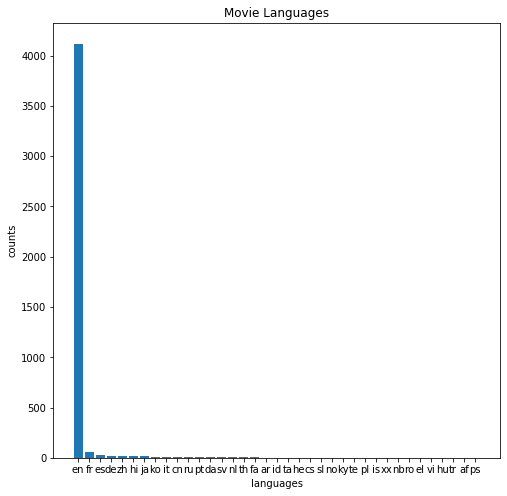

In [214]:
plt.figure(figsize=(8,8))
plt.bar(original_lang.value_counts().index,original_lang.value_counts())
plt.xlabel('languages')
plt.ylabel('counts')
plt.title("Movie Languages")

In [215]:
df.columns

Index(['title', 'id', 'budget', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'cast', 'director', 'action', 'adventure',
       'animation', 'comedy', 'crime', 'documentary', 'drama', 'family',
       'fantasy', 'fiction', 'foreign', 'history', 'horror', 'movie', 'music',
       'mystery', 'romance', 'science', 'thriller', 'tv', 'war', 'western'],
      dtype='object')

2) Transforming Numerical Features

In [216]:
df.describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
count,4375.000000,4.375000e+03,4375.000000,4.375000e+03,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000
mean,51005.005486,3.123406e+07,23.238464,8.954464e+07,108.210286,6.192709,752.174171,0.245714,0.174857,0.049143,0.357943,0.147657,0.018971,0.482286,0.104457,0.092114,0.114971,0.004800,0.043657,0.109943,0.001143,0.039086,0.075886,0.186286,0.114971,0.268343,0.001143,0.031314,0.016229
std,82295.034418,4.175228e+07,32.767476,1.685881e+08,21.281673,1.001256,1275.892503,0.430559,0.379888,0.216191,0.479450,0.354800,0.136440,0.499743,0.305888,0.289220,0.319024,0.069123,0.204354,0.312854,0.033791,0.193821,0.264845,0.389382,0.319024,0.443148,0.033791,0.174186,0.126368
min,5.000000,0.000000e+00,0.001117,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8380.000000,2.000000e+06,6.092970,0.000000e+00,94.000000,5.700000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13064.000000,1.600000e+07,14.779041,2.560502e+07,104.000000,6.300000,286.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49522.500000,4.148885e+07,30.262543,1.020000e+08,118.000000,6.800000,831.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,433715.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [217]:
#scaling budget and revenue as the values are very large
df['budget']/=10**6
df['revenue']/=10**6

In [218]:
#renaming columns

df.rename(columns={'budget':"budget(millions usd)",'revenue':'revenue(millions usd)'},inplace=True)

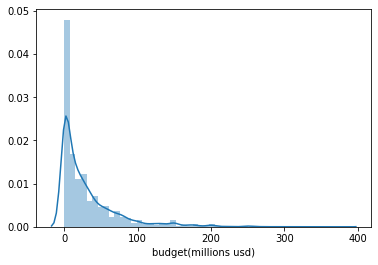

In [219]:
# Distribution for Numerical Columns
sns.distplot(df['budget(millions usd)'])

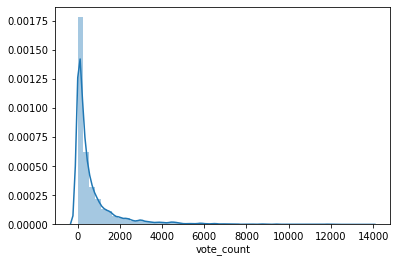

In [220]:
sns.distplot(df['vote_count'])

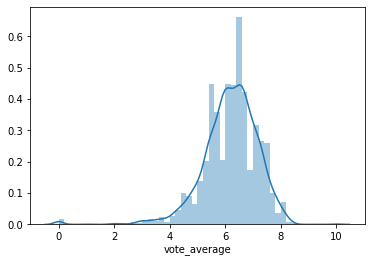

In [221]:
sns.distplot(df['vote_average'])

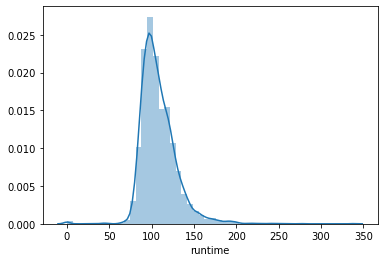

In [222]:
sns.distplot(df['runtime'])

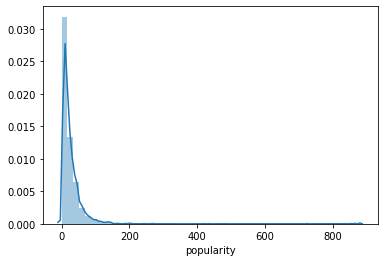

In [223]:
sns.distplot(df['popularity'])

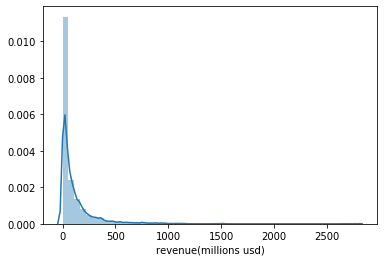

In [224]:
sns.distplot(df['revenue(millions usd)'])

### Feature Scaling

##### Since all the numerical features have heavy tails  minmax scaling won't be ideal thus we use StandardScaler for scaling our numerical data

In [227]:
#using standard scalar
scaler = StandardScaler()
numerical_columns=['popularity','runtime','vote_average','vote_count','budget(millions usd)','revenue(millions usd)']
df_numerical=df[numerical_columns]
df_numerical.head()

,popularity,runtime,vote_average,vote_count,budget(millions usd),revenue(millions usd)
0,150.437577,162.0,7.2,11800,237.0,2787.965087
1,139.082615,169.0,6.9,4500,300.0,961.000000
2,107.376788,148.0,6.3,4466,245.0,880.674609
3,112.312950,165.0,7.6,9106,250.0,1084.939099
4,43.926995,132.0,6.1,2124,260.0,284.139100


In [228]:
scaler.fit(df_numerical)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [230]:
data_transformed=scaler.transform(df_numerical)

In [232]:
df_transformed=df

In [233]:
df_transformed[numerical_columns]=data_transformed

In [236]:
df_transformed

,title,id,budget(millions usd),keywords,original_language,original_title,overview,popularity,revenue(millions usd),runtime,vote_average,vote_count,cast,director,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,Avatar,19995,4.928820,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",3.882315,16.007821,2.527802,1.006143,8.659890,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,285,6.437892,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",3.535744,5.169729,2.856761,0.706485,2.937751,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Spectre,206647,5.120448,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,2.568032,4.693215,1.869884,0.107169,2.911100,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,49026,5.240216,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,2.718692,5.904972,2.668785,1.405686,6.548185,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,John Carter,49529,5.479751,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",0.631446,1.154391,1.117978,-0.092603,1.075312,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,Bang,124606,-0.748166,gang audition police fake homeless actress,en,Bang,A young woman in L.A. is having a bad day: she...,-0.681252,-0.531205,-0.479824,-0.192489,-0.588811,Darling Narita Peter Greene Michael Newland Er...,Ash Baron-Cohen,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4371,Primer,14337,-0.747998,distrust garage identity crisis time travel ti...,en,Primer,Friends/fledgling entrepreneurs invent a devic...,0.002121,-0.528685,-1.466701,0.706485,-0.073819,Shane Carruth David Sullivan Casey Gooden Anan...,Shane Carruth,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
4372,El Mariachi,9367,-0.742896,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,-0.273738,-0.519098,-1.278724,0.406827,-0.403038,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4373,"Signed, Sealed, Delivered",231617,-0.748166,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",-0.665186,-0.531205,0.554048,0.806371,-0.584892,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [241]:
df_transformed.head()

,title,id,budget(millions usd),keywords,original_language,original_title,overview,popularity,revenue(millions usd),runtime,vote_average,vote_count,cast,director,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,Avatar,19995,4.928820,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",3.882315,16.007821,2.527802,1.006143,8.659890,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,285,6.437892,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",3.535744,5.169729,2.856761,0.706485,2.937751,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Spectre,206647,5.120448,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,2.568032,4.693215,1.869884,0.107169,2.911100,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,49026,5.240216,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,2.718692,5.904972,2.668785,1.405686,6.548185,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,John Carter,49529,5.479751,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",0.631446,1.154391,1.117978,-0.092603,1.075312,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [242]:
df_transformed.shape

(4375, 36)

In [243]:
df_transformed.describe()

,id,budget(millions usd),popularity,revenue(millions usd),runtime,vote_average,vote_count,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
count,4375.000000,4.375000e+03,4.375000e+03,4.375000e+03,4.375000e+03,4.375000e+03,4.375000e+03,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000
mean,51005.005486,-5.307754e-15,2.336924e-16,2.634033e-15,-8.456981e-16,6.339120e-16,-2.442795e-15,0.245714,0.174857,0.049143,0.357943,0.147657,0.018971,0.482286,0.104457,0.092114,0.114971,0.004800,0.043657,0.109943,0.001143,0.039086,0.075886,0.186286,0.114971,0.268343,0.001143,0.031314,0.016229
std,82295.034418,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,1.000114e+00,0.430559,0.379888,0.216191,0.479450,0.354800,0.136440,0.499743,0.305888,0.289220,0.319024,0.069123,0.204354,0.312854,0.033791,0.193821,0.264845,0.389382,0.319024,0.443148,0.033791,0.174186,0.126368
min,5.000000,-7.481659e-01,-7.092399e-01,-5.312051e-01,-5.085251e+00,-6.185645e+00,-5.895952e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8380.000000,-7.002588e-01,-5.233071e-01,-5.312051e-01,-6.678004e-01,-4.921466e-01,-5.292384e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13064.000000,-3.649095e-01,-2.581947e-01,-3.793086e-01,-1.978588e-01,1.071691e-01,-3.654128e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49522.500000,2.456384e-01,2.143858e-01,7.388884e-02,4.600594e-01,6.065987e-01,6.178799e-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,433715.000000,8.354174e+00,2.601483e+01,1.600782e+01,1.079877e+01,3.802949e+00,1.018997e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Processing Directors column

In [244]:
df = df_transformed

In [257]:
director = df['director'].value_counts()
director

Steven Spielberg     27
Martin Scorsese      20
Woody Allen          20
Clint Eastwood       19
Ridley Scott         16
                     ..
Harry Beaumont        1
Fyodor Bondarchuk     1
Shyam Madiraju        1
Paul Weiland          1
Bruce McDonald        1
Name: director, Length: 2091, dtype: int64

In [258]:
director.index

Index(['Steven Spielberg', 'Martin Scorsese', 'Woody Allen', 'Clint Eastwood',
       'Ridley Scott', 'Renny Harlin', 'Steven Soderbergh', 'Robert Rodriguez',
       'Oliver Stone', 'Tim Burton',
       ...
       'Ben Younger', 'Lisa Azuelos', 'Katt Shea', 'Sngmoo Lee',
       'Alex Craig Mann', 'Harry Beaumont', 'Fyodor Bondarchuk',
       'Shyam Madiraju', 'Paul Weiland', 'Bruce McDonald'],
      dtype='object', length=2091)

In [261]:
# encoding directors from string of names to integer categories
label_encoder=LabelEncoder()
label_encoder.fit(df['director'])
directors_encoded=label_encoder.transform(df['director'])
df['director encoded']=directors_encoded

In [268]:
label_encoder.classes_

array(['Aaron Hann', 'Aaron Schneider', 'Abel Ferrara', ...,
       '\\u00c1lex de la Iglesia', '\\u00c9mile Gaudreault',
       '\\u00c9ric Tessier'], dtype=object)

In [272]:
# changing column order 
col=df.columns.tolist()
col_updated=col[:14]+col[-1:]+col[14:]
df=df[col_updated]

In [281]:
df.head()

,title,id,budget(millions usd),keywords,original_language,original_title,overview,popularity,revenue(millions usd),runtime,vote_average,vote_count,cast,director,director encoded,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western,director encoded
0,Avatar,19995,4.928820,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",3.882315,16.007821,2.527802,1.006143,8.659890,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,790,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,790
1,Pirates of the Caribbean: At World's End,285,6.437892,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",3.535744,5.169729,2.856761,0.706485,2.937751,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,684,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,684
2,Spectre,206647,5.120448,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,2.568032,4.693215,1.869884,0.107169,2.911100,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,1759,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1759
3,The Dark Knight Rises,49026,5.240216,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,2.718692,5.904972,2.668785,1.405686,6.548185,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,324,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,324
4,John Carter,49529,5.479751,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",0.631446,1.154391,1.117978,-0.092603,1.075312,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,89,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,89
